In [2]:
import csv
import numpy as np

In [3]:
def build_dict_from_csv(path, first_line_idx=0, separator=',', rating_idx=2):
    res_dict = {}

    with open(path, newline='\n') as csv_file:
        reader = csv.reader(csv_file, delimiter=separator)

        for idx, row in enumerate(reader):
            if idx < first_line_idx:
                continue     
            res_dict[row[0] + ',' + row[1]] = row[rating_idx]
    
    return res_dict

In [4]:
def reverse_pair(pair_key):
    pair = pair_key.split(',')
    
    return pair[1] + ',' + pair[0]

In [5]:
def find_asymm_pairs(pairs_dict):
    arr = list(pairs_dict.keys())
    
    reversed_arr = [reverse_pair(row) for row in arr]
    direct_set = set(arr)
    reversed_set = set(reversed_arr)
    intersected_keys = list(set.intersection(direct_set, reversed_set))
    
    sym_keys = []

    for key in intersected_keys:
        if reverse_pair(key) in sym_keys or reverse_pair(key) == key:
            continue
        sym_keys.append(key)
        
    if len(sym_keys) == 0:
        print('no asymmetrical pairs')
    
    for key in sym_keys:
        val1 = pairs_dict[key]
        val2 = pairs_dict[reverse_pair(key)]
        print(key + ',' + val1, ';', reverse_pair(key) + ',' + val2)
        
    return sym_keys

In [6]:
def find_all_symm_keys(pairs_dict):
    arr = list(pairs_dict.keys())
    
    reversed_arr = [reverse_pair(row) for row in arr]
    direct_set = set(arr)
    reversed_set = set(reversed_arr)
    intersected_keys = list(set.intersection(direct_set, reversed_set))

    return intersected_keys

In [142]:
def calculate_POS_distribution(labels):
    # POS - part of speech
    # labels - list of pairs ('label1', 'label2')
    speech_parts = {}
    for label_pair in labels:
        for label in label_pair:
            if label not in speech_parts:
                speech_parts[label] = 1
            else:
                speech_parts[label] += 1
    
    for part in speech_parts:
        speech_parts[part] /= (len(labels) * 2)
    
    return speech_parts

In [192]:
def get_all_words_and_labels(pairs_dict, labels):
    all_words = []
    all_words_labels = []
    
    # for pair, label_pair in zip(list(pairs_dict.keys()), labels):
    #     for word, label in zip(pair.split(','), label_pair):
    #         if word not in all_words:
    #             all_words.append(word)
    #             all_words_labels.append(label)
                
    for pair in pairs_dict.keys():
        word_pair = pair
        label_pair = labels[pair]
        
        for word, label in zip(word_pair.split(','), label_pair):
            if word not in all_words:
                all_words.append(word)
                all_words_labels.append(label)
    
    return all_words, all_words_labels

In [193]:
def get_all_pairs_with_word(pairs_dict, word):
    res = []
    
    for pair in pairs_dict.keys():
        if pair.split(',')[0] == word or pair.split(',')[1] == word:
            res.append(pair)
            
    return res

In [194]:
# далее предполагаем, что у слова в паре в большинстве встречаются слова той же части речи

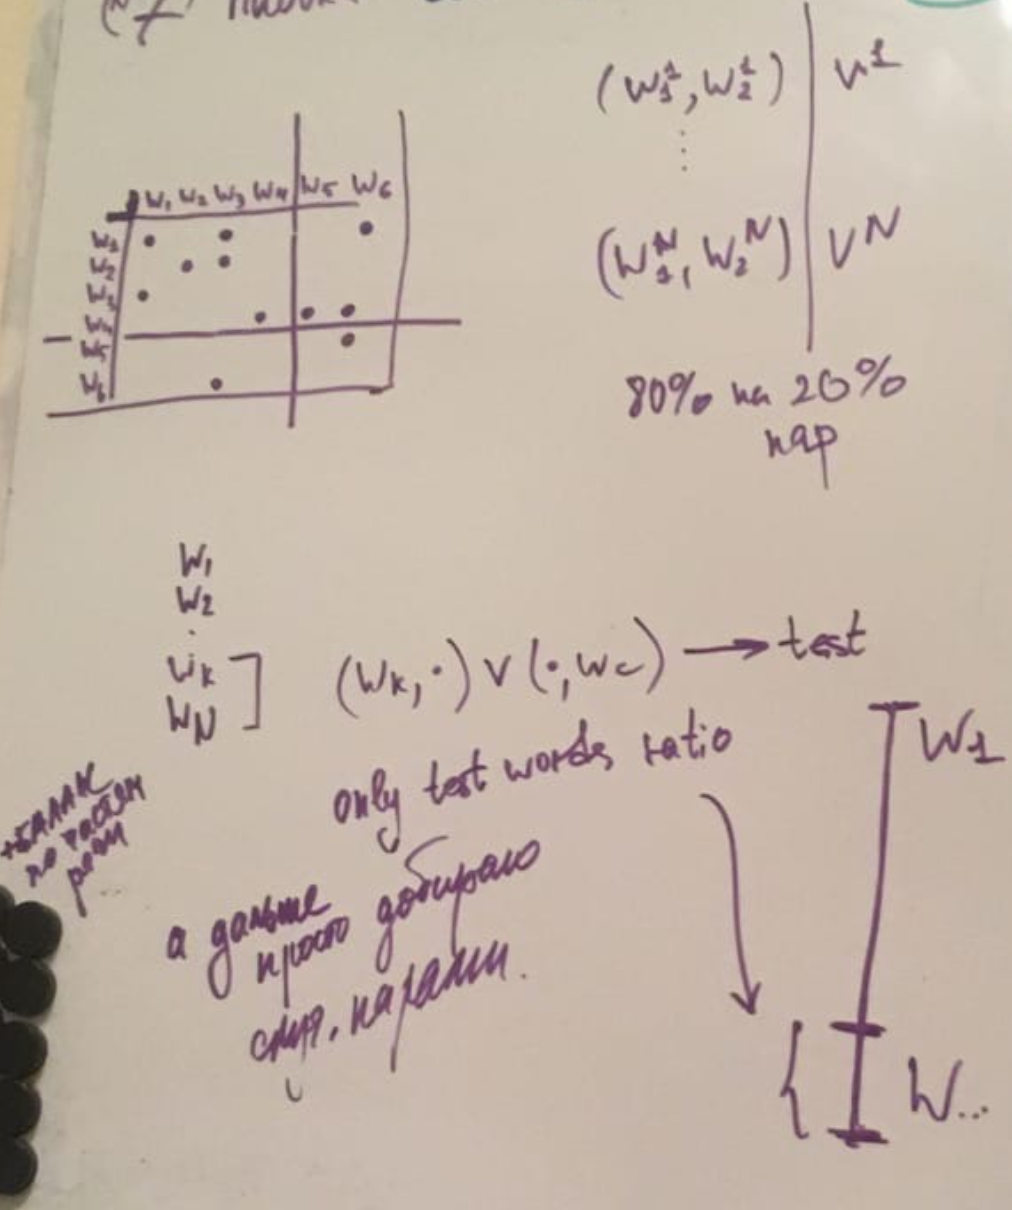

In [329]:
from IPython.display import Image

Image(filename = "demo.png", width=400, height=700)

In [195]:
def train_test_split(pairs_dict, labels, test_ratio, only_test_words_ratio=0.2):
    # pairs_dict - dict with string keys 'word1,word2' and distance values
    # labels - dict with string keys 'word1,word2' and values ('label1', 'label2')
    # test_ratio - part of pairs that goes to test
    # only_test_words_ratio - part of words that exists only in test
    
    POS_distr = calculate_POS_distribution(labels.values())
    
    all_words, all_words_labels = get_all_words_and_labels(pairs_dict, labels)
    
    all_words_size = len(all_words)
    only_test_words_size = int(all_words_size * only_test_words_ratio)
    test_size = int(len(pairs_dict) * test_ratio)
    
    test_dict = {}
    
    for idx in range(only_test_words_size):
        if (len(test_dict) >= test_size):
            break
            
        curr_label = np.random.choice(list(POS_distr.keys()), p=list(POS_distr.values()))
        possible_words_idxs = np.where(np.array(all_words_labels) == curr_label)[0]
        # potencial slowness: calculating on every iter, can be calculated once for all labels
        curr_word_idx = np.random.choice(possible_words_idxs)
        curr_word = all_words[curr_word_idx]
        all_words.pop(curr_word_idx)
        all_words_labels.pop(curr_word_idx)
        
        for pair in pairs_dict.keys():
            if pair.split(',')[0] == curr_word or pair.split(',')[1] == curr_word:
                test_dict[pair] = pairs_dict[pair]
                
    gap_size = test_size - len(test_dict)
    if gap_size > 0:
        # all_words, all_words_labels = get_all_words_and_labels(pairs_dict, labels)
        
        while len(test_dict) < test_size:
            # a little bit code duplication
            curr_label = np.random.choice(list(POS_distr.keys()), p=list(POS_distr.values()))
            possible_words_idxs = np.where(np.array(all_words_labels) == curr_label)[0]
            curr_word_idx = np.random.choice(possible_words_idxs)
            curr_word = all_words[curr_word_idx]
            
            potencial_pairs = get_all_pairs_with_word(pairs_dict, curr_word)
            pair = np.random.choice(potencial_pairs)
            
            if pair not in test_dict:
                test_dict[pair] = pairs_dict[pair]
    
    train_dict = {}
    for pair in pairs_dict:
        if pair not in test_dict:
            train_dict[pair] = pairs_dict[pair]
    
    return train_dict, test_dict

In [198]:
pairs_dict = build_dict_from_csv('MEN_dataset_lemma_form_full', 0, ' ')

In [199]:
pairs_dict

{'sun-n,sunlight-n': '50.000000',
 'automobile-n,car-n': '50.000000',
 'river-n,water-n': '49.000000',
 'stair-n,staircase-n': '49.000000',
 'morning-n,sunrise-n': '49.000000',
 'rain-n,storm-n': '49.000000',
 'cat-n,kitten-n': '49.000000',
 'dance-n,dancer-n': '49.000000',
 'camera-n,photography-n': '49.000000',
 'cat-n,feline-j': '48.000000',
 'sunny-j,sunshine-n': '48.000000',
 'pregnancy-n,pregnant-j': '48.000000',
 'beach-n,sand-n': '48.000000',
 'bakery-n,bread-n': '48.000000',
 'flower-n,garden-n': '48.000000',
 'grass-n,lawn-n': '48.000000',
 'copper-n,metal-n': '48.000000',
 'photo-n,photography-n': '47.000000',
 'cemetery-n,graveyard-n': '47.000000',
 'gravestone-n,graveyard-n': '47.000000',
 'sun-n,sunshine-n': '47.000000',
 'black-j,dark-j': '47.000000',
 'cathedral-n,church-n': '47.000000',
 'frozen-j,ice-n': '47.000000',
 'station-n,subway-n': '47.000000',
 'child-n,kid-n': '46.000000',
 'aquarium-n,fish-n': '46.000000',
 'light-n,lighting-n': '46.000000',
 'fungus-n,mush

In [200]:
MEN_labels = [(pair.split(',')[0][-1], pair.split(',')[1][-1]) for pair in list(pairs_dict.keys())]
MEN_labels

[('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'j'),
 ('j', 'n'),
 ('n', 'j'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('j', 'j'),
 ('n', 'n'),
 ('j', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('v', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'j'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('j', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),
 ('n', 'n'),

In [201]:
def get_MEN_labels(MENlike_pairs_dict):
    res = {}
    for pair in list(MENlike_pairs_dict.keys()):
        res[pair] = (pair.split(',')[0][-1], pair.split(',')[1][-1]) 
    
    return res

In [202]:
calculate_POS_distribution(get_MEN_labels(pairs_dict).values())

{'n': 0.8051666666666667, 'j': 0.125, 'v': 0.06983333333333333}

In [203]:
calculate_POS_distribution(MEN_labels).values()

dict_values([0.8051666666666667, 0.125, 0.06983333333333333])

In [306]:
train, test = train_test_split(pairs_dict, get_MEN_labels(pairs_dict), 0.3, only_test_words_ratio=0.2)

In [307]:
len(pairs_dict)

3000

In [308]:
len(train)

2091

In [309]:
len(test)

909

In [310]:
len(test) / len(pairs_dict)

0.303

In [311]:
calculate_POS_distribution(get_MEN_labels(train).values())

{'n': 0.8414634146341463, 'j': 0.1092778574844572, 'v': 0.04925872788139646}

In [312]:
calculate_POS_distribution(get_MEN_labels(test).values())

{'n': 0.7216721672167217, 'j': 0.16116611661166116, 'v': 0.11716171617161716}

In [313]:
train_words = set()
for pair in train.keys():
    for word in pair.split(','):
        train_words.add(word)

In [314]:
test_words = set()
for pair in test.keys():
    for word in pair.split(','):
        test_words.add(word)

In [315]:
len(train_words)

622

In [316]:
len(test_words)

533

In [317]:
len(set.intersection(train_words, test_words))

404

In [318]:
len(train_words) - len(set.intersection(train_words, test_words))

218

In [319]:
len(test_words) - len(set.intersection(train_words, test_words))

129

In [320]:
(len(test_words) - len(set.intersection(train_words, test_words))) / len(test_words)

0.24202626641651032

*то есть нападало еще 0.05 уникальных для теста слов за счет сэмплирования пар из матрицы без полосы*

**word freq**

In [11]:
# pairs_dict = build_dict_from_csv('combined.csv', 1) #WordSim
# pairs_dict = build_dict_from_csv('SimLex-999.txt', 1, '\t', 3) #SimLex
# pairs_dict = build_dict_from_csv('MEN_dataset_natural_form_full', 0, ' ') #MEN

In [12]:
find_all_symm_keys(pairs_dict)

['money,bank', 'bank,money', 'tiger,tiger']

In [31]:
pairs = list(pairs_dict.keys())

In [32]:
pairs

['sun,sunlight',
 'automobile,car',
 'river,water',
 'stairs,staircase',
 'morning,sunrise',
 'rain,storm',
 'cat,kittens',
 'dance,dancers',
 'camera,photography',
 'cat,feline',
 'sunny,sunshine',
 'pregnancy,pregnant',
 'beach,sand',
 'bakery,bread',
 'flowers,garden',
 'grass,lawn',
 'copper,metal',
 'photos,photography',
 'cemetery,graveyard',
 'gravestone,graveyard',
 'sun,sunshine',
 'black,dark',
 'cathedral,church',
 'frozen,ice',
 'station,subway',
 'children,kids',
 'aquarium,fish',
 'light,lighting',
 'fungi,mushrooms',
 'frost,snow',
 'burn,flame',
 'ocean,sea',
 'candy,chocolate',
 'car,vehicle',
 'concert,music',
 'photos,picture',
 'grapes,wine',
 'bath,bathroom',
 'buds,flowers',
 'cat,kitty',
 'ocean,water',
 'aircraft,airplane',
 'butterfly,caterpillars',
 'hair,wig',
 'blossom,buds',
 'highway,road',
 'bunny,rabbit',
 'bread,sandwich',
 'mist,misty',
 'flowers,petals',
 'airplane,flight',
 'fish,fishing',
 'ice,snow',
 'bright,sun',
 'shade,tree',
 'bicycle,bike',
 

In [33]:
freq_dict = {}

for pair in pairs:
    for word in pair.split(','):
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [34]:
freq_dict

{'sun': 14,
 'sunlight': 11,
 'automobile': 7,
 'car': 10,
 'river': 9,
 'water': 16,
 'stairs': 24,
 'staircase': 21,
 'morning': 29,
 'sunrise': 7,
 'rain': 18,
 'storm': 8,
 'cat': 9,
 'kittens': 8,
 'dance': 4,
 'dancers': 3,
 'camera': 8,
 'photography': 5,
 'feline': 11,
 'sunny': 28,
 'sunshine': 29,
 'pregnancy': 4,
 'pregnant': 5,
 'beach': 12,
 'sand': 9,
 'bakery': 7,
 'bread': 11,
 'flowers': 21,
 'garden': 12,
 'grass': 9,
 'lawn': 4,
 'copper': 3,
 'metal': 4,
 'photos': 3,
 'cemetery': 6,
 'graveyard': 10,
 'gravestone': 9,
 'black': 20,
 'dark': 21,
 'cathedral': 4,
 'church': 8,
 'frozen': 13,
 'ice': 5,
 'station': 9,
 'subway': 14,
 'children': 10,
 'kids': 8,
 'aquarium': 4,
 'fish': 5,
 'light': 10,
 'lighting': 9,
 'fungi': 8,
 'mushrooms': 6,
 'frost': 21,
 'snow': 11,
 'burn': 4,
 'flame': 7,
 'ocean': 6,
 'sea': 16,
 'candy': 3,
 'chocolate': 9,
 'vehicle': 10,
 'concert': 7,
 'music': 12,
 'picture': 4,
 'grapes': 4,
 'wine': 8,
 'bath': 12,
 'bathroom': 16,
 

In [35]:
list(freq_dict.values())

[14,
 11,
 7,
 10,
 9,
 16,
 24,
 21,
 29,
 7,
 18,
 8,
 9,
 8,
 4,
 3,
 8,
 5,
 11,
 28,
 29,
 4,
 5,
 12,
 9,
 7,
 11,
 21,
 12,
 9,
 4,
 3,
 4,
 3,
 6,
 10,
 9,
 20,
 21,
 4,
 8,
 13,
 5,
 9,
 14,
 10,
 8,
 4,
 5,
 10,
 9,
 8,
 6,
 21,
 11,
 4,
 7,
 6,
 16,
 3,
 9,
 10,
 7,
 12,
 4,
 4,
 8,
 12,
 16,
 14,
 5,
 7,
 9,
 8,
 3,
 9,
 6,
 16,
 5,
 9,
 1,
 6,
 8,
 14,
 24,
 19,
 10,
 7,
 26,
 31,
 7,
 4,
 6,
 6,
 26,
 6,
 10,
 8,
 4,
 5,
 23,
 22,
 4,
 3,
 22,
 4,
 6,
 8,
 5,
 17,
 12,
 12,
 10,
 7,
 8,
 18,
 7,
 19,
 5,
 1,
 6,
 8,
 6,
 9,
 9,
 9,
 12,
 6,
 20,
 11,
 10,
 14,
 6,
 25,
 13,
 4,
 6,
 6,
 10,
 17,
 4,
 8,
 4,
 7,
 14,
 7,
 5,
 5,
 5,
 6,
 5,
 4,
 4,
 7,
 16,
 19,
 8,
 7,
 7,
 5,
 9,
 16,
 4,
 12,
 4,
 4,
 10,
 11,
 7,
 7,
 8,
 4,
 6,
 13,
 6,
 12,
 9,
 3,
 8,
 6,
 3,
 3,
 7,
 17,
 10,
 7,
 6,
 6,
 12,
 16,
 11,
 11,
 10,
 19,
 16,
 12,
 4,
 6,
 14,
 9,
 15,
 11,
 8,
 13,
 9,
 12,
 10,
 3,
 7,
 18,
 9,
 27,
 6,
 3,
 12,
 9,
 19,
 8,
 15,
 20,
 10,
 8,
 12,
 2,
 15,
 12,
 1,


In [36]:
(np.array(list(freq_dict.values())) > 1).sum()

709